In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('D:loan/loan.csv')

In [4]:
# Loan_ID : Unique Loan ID

# Gender : Male/ Female

# Married : Applicant married (Y/N)

# Dependents : Number of dependents

# Education : Applicant Education (Graduate/ Under Graduate)

# Self_Employed : Self employed (Y/N)

# ApplicantIncome : Applicant income

# CoapplicantIncome : Coapplicant income

# LoanAmount : Loan amount in thousands of dollars

# Loan_Amount_Term : Term of loan in months

# Credit_History : Credit history meets guidelines yes or no

# Property_Area : Urban/ Semi Urban/ Rural

# Loan_Status : Loan approved (Y/N) this is the target variable

### 1. Display Top 5 Rows of The Dataset

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Check Last 5 Rows of The Dataset

In [6]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [7]:
data.shape

(614, 13)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 614
Number of Columns 13


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 5. Check Null Values In The Dataset

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data.isnull().sum()*100 / len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### 6. Handling The missing Values

In [12]:
data = data.drop('Loan_ID',axis=1)

In [13]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [14]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [15]:
data = data.dropna(subset=columns)

In [16]:
data.isnull().sum()*100 / len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [17]:
data['Self_Employed'].mode()[0]

'No'

In [18]:
data['Self_Employed'] =data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [19]:
data.isnull().sum()*100 / len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [20]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
data['Credit_History'].mode()[0]

1.0

In [23]:
data['Credit_History'] =data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [24]:
data.isnull().sum()*100 / len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

Number of people who have taken the loan, grouped by gender:
Gender
Male      449
Female    104
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

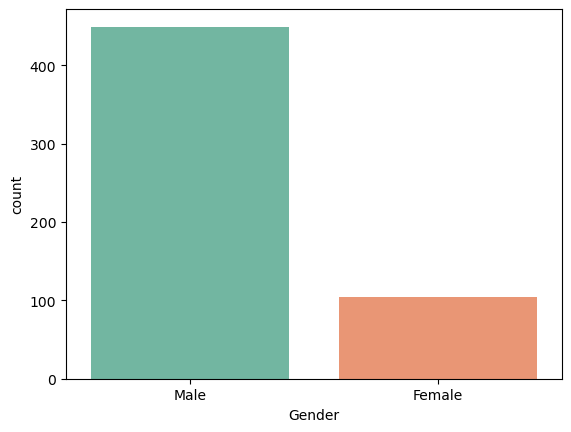

In [25]:
print("Number of people who have taken the loan, grouped by gender:")
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, palette='Set2')

Number of people who have taken loan, grouped by marital status:
Married
Yes    359
No     194
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

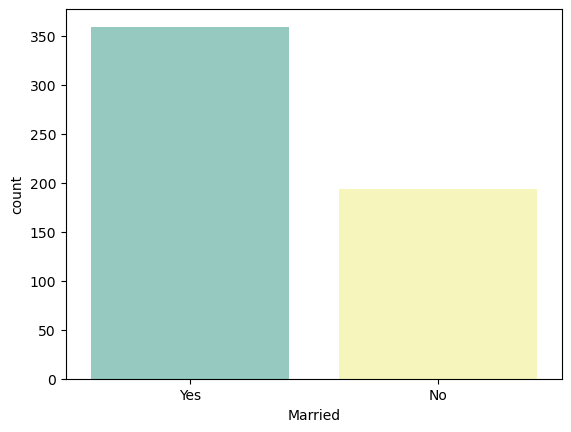

In [26]:
print("Number of people who have taken loan, grouped by marital status:")
print(data['Married'].value_counts())
sns.countplot(x='Married', data=data, palette='Set3')

Number of people who have taken the loan, grouped by dependents:
Dependents
0     316
1      96
2      96
3+     45
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

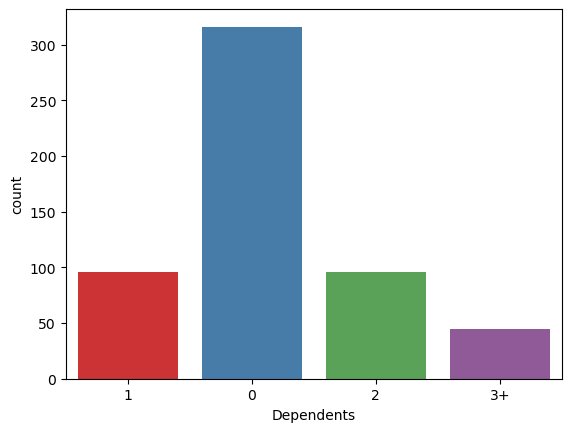

In [27]:
print("Number of people who have taken the loan, grouped by dependents:")
print(data['Dependents'].value_counts())
sns.countplot(x='Dependents', data=data, palette='Set1')

Number of people who have taken the loan, grouped by Self Employment:
Self_Employed
No     481
Yes     72
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

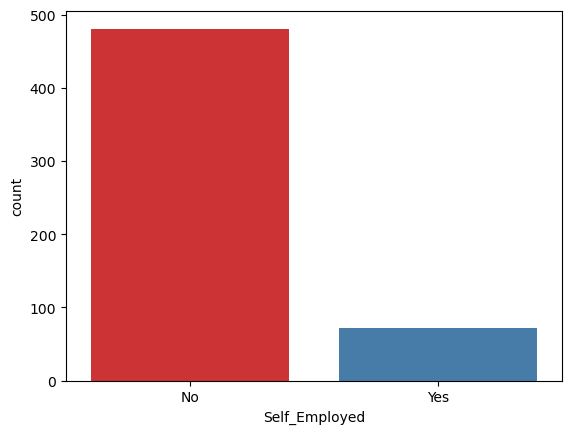

In [28]:
print("Number of people who have taken the loan, grouped by Self Employment:")
print(data['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=data, palette='Set1')

Number of people who have taken the loan, grouped by loan amount:
LoanAmount
120.0    18
110.0    15
100.0    14
187.0    12
128.0    11
         ..
42.0      1
72.0      1
240.0     1
214.0     1
253.0     1
Name: count, Length: 199, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

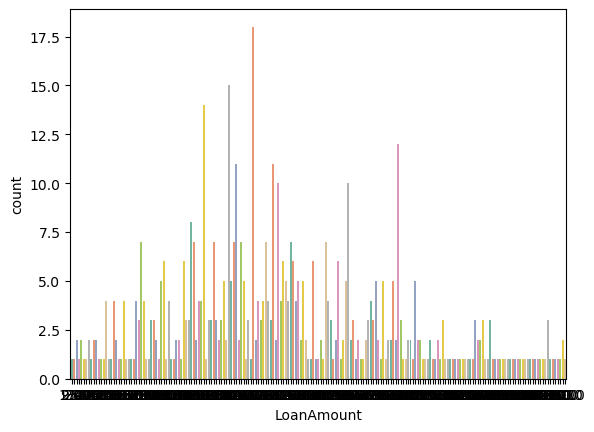

In [29]:
print("Number of people who have taken the loan, grouped by loan amount:")
print(data['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data=data, palette='Set2')

Number of people who have taken the loan, grouped by credit history:
Credit_History
1.0    482
0.0     71
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

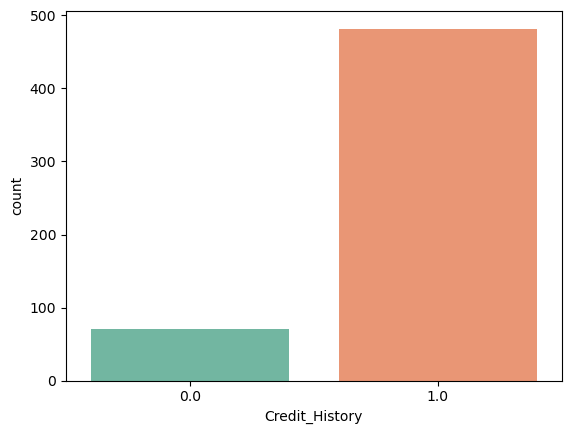

In [30]:
print("Number of people who have taken the loan, grouped by credit history:")
print(data['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=data, palette='Set2')

### 7. Handling Categorical Columns

In [31]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
439,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.0,360.0,1.0,Rural,Y
395,Male,Yes,2,Graduate,No,3276,484.0,135.0,360.0,1.0,Semiurban,Y
494,Male,Yes,0,Graduate,No,3597,2157.0,119.0,360.0,0.0,Rural,N
543,Male,Yes,1,Not Graduate,No,2239,2524.0,128.0,360.0,1.0,Urban,Y
391,Male,Yes,3+,Graduate,No,9504,0.0,275.0,360.0,1.0,Rural,Y


In [32]:
data['Dependents'] =data['Dependents'].replace(to_replace="3+",value='4')

In [33]:
data['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [34]:
data['Property_Area'] =data['Property_Area'].replace(to_replace="Semi-urban",value='Semiurban')

In [35]:
data['Property_Area'] =data['Property_Area'].replace(to_replace="semiurban",value='Semiurban')

In [36]:
data['Gender'] =data['Gender'].replace(to_replace="1",value='Male')

In [37]:
data['Gender'] =data['Gender'].replace(to_replace="0",value='Female')

In [38]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [39]:
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [40]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [41]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


### 8. Store Feature Matrix In X And Response (Target) In Vector y

In [42]:
X = data.drop('Loan_Status',axis=1)

In [43]:
y = data['Loan_Status']

In [44]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

### 9. Feature Scaling

In [45]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [46]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [47]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [48]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


### 10. Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation 

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [50]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)
    

In [51]:
model_df

{}

### 11. Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


### 12. SVC

In [53]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7927927927927928
SVC() Avg cross val score is 0.7938902538902539


### 13. Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.7027027027027027
DecisionTreeClassifier() Avg cross val score is 0.7106961506961508


### 14. Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.7747747747747747
RandomForestClassifier() Avg cross val score is 0.7793939393939393


### 15. Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.7927927927927928
GradientBoostingClassifier() Avg cross val score is 0.7776085176085176


### 16. Hyperparameter Tuning

In [57]:
from sklearn.model_selection import RandomizedSearchCV

### Logistic Regression

In [58]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [59]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)

In [60]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [61]:
rs_log_reg.best_score_

0.8047829647829647

In [62]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

### SVC

In [63]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [64]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions=svc_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [65]:
rs_svc.fit(X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\anton\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [66]:
rs_svc.best_score_

0.8066011466011467

In [67]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

###  Random Forest Classifier

In [68]:
RandomForestClassifier()

RandomForestClassifier()

In [69]:
rf_grid={'n_estimators':np.arange(10,1000,10),
  'max_features':['auto','sqrt'],
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,10]
 }

In [70]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [71]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\anton\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\anton\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\anton\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\anton\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\anton\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\anton\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [72]:
rs_rf.best_score_

0.8066175266175266

In [73]:
rs_rf.best_params_

{'n_estimators': 330,
 'min_samples_split': 50,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

In [74]:
LogisticRegression score Before Hyperparameter Tuning: 80.48
LogisticRegression score after Hyperparameter Tuning: 80.48 
    
------------------------------------------------------
SVC score Before Hyperparameter Tuning: 79.38
SVC score after Hyperparameter Tuning: 80.66
    
--------------------------------------------------------
RandomForestClassifier score Before Hyperparameter Tuning: 77.76
RandomForestClassifier score after Hyperparameter Tuning: 80.66 


SyntaxError: invalid syntax (498374477.py, line 1)

### 17. Save The Model

In [75]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [76]:
rf = RandomForestClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)

In [77]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270)

In [78]:
import joblib

In [79]:
joblib.dump(rf,'loan_status_predict')

['loan_status_predict']

In [80]:
model = joblib.load('loan_status_predict')

In [81]:
import pandas as pd
df = pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [82]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [83]:
result = model.predict(df)

In [84]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


# GUI

In [149]:
from tkinter import *
import joblib
import pandas as pd

In [150]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())
    p9 = float(e9.get())
    p10 = float(e10.get())
    p11 = float(e11.get())
    
    model = joblib.load('loan_status_predict')
    df = pd.DataFrame({
    'Gender':p1,
    'Married':p2,
    'Dependents':p3,
    'Education':p4,
    'Self_Employed':p5,
    'ApplicantIncome':p6,
    'CoapplicantIncome':p7,
    'LoanAmount':p8,
    'Loan_Amount_Term':p9,
    'Credit_History':p10,
    'Property_Area':p11
},index=[0])
    result = model.predict(df)
    
    if result == 1:
        Label(master, text="Loan approved").grid(row=31)
    else:
        Label(master, text="Loan Not Approved").grid(row=31)
        
    
master =Tk()
master.title("Loan Status Prediction Using Machine Learning")
label = Label(master,text = "Loan Status Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Gender [1:Male ,0:Female]").grid(row=1)
Label(master,text = "Married [1:Yes,0:No]").grid(row=2)
Label(master,text = "Dependents [1,2,3,4]").grid(row=3)
Label(master,text = "Education").grid(row=4)
Label(master,text = "Self_Employed").grid(row=5)
Label(master,text = "ApplicantIncome").grid(row=6)
Label(master,text = "CoapplicantIncome").grid(row=7)
Label(master,text = "LoanAmount").grid(row=8)
Label(master,text = "Loan_Amount_Term").grid(row=9)
Label(master,text = "Credit_History").grid(row=10)
Label(master,text = "Property_Area").grid(row=11)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()